In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [37]:
df = pd.read_csv("svm_dataset.csv")

# Outcome = 0   Sağlıklı 
# Outcome = 1   Diabet/Şeker hastası

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,50,16,375,25.9,0.655,24,0
1,11,155,76,28,150,33.3,1.353,51,1
2,3,191,68,15,130,30.9,0.299,34,0
3,3,141,0,0,0,30.0,0.761,27,1
4,4,95,70,32,0,32.1,0.612,24,0
5,3,142,80,15,0,32.4,0.200,63,0
6,4,123,62,0,0,32.0,0.226,35,1
7,5,96,74,18,67,33.6,0.997,43,0
8,0,138,0,0,0,36.3,0.933,25,1
9,2,128,64,42,0,40.0,1.101,24,0


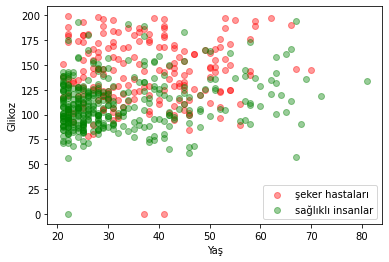

In [3]:
seker_hastalari=df[df.Outcome==1]
saglıklı_insanlar=df[df.Outcome==0]

plt.scatter(seker_hastalari["Age"],seker_hastalari["Glucose"],color="red",alpha=0.4,label="şeker hastaları")
plt.scatter(saglıklı_insanlar["Age"],saglıklı_insanlar["Glucose"],color="green",alpha=0.4,label="sağlıklı insanlar")
plt.xlabel("Yaş")
plt.ylabel("Glikoz")
plt.legend()
plt.show()

In [130]:
x_orjinal = df.iloc[:,:-1] # df.drop("Outcome",axis=1)
y = df["Outcome"]

In [197]:
x = (x_orjinal-np.min(x_orjinal))/(np.max(x_orjinal)-np.min(x_orjinal))

In [152]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

<span style="color:green">***svm modelimizi oluşturuyoruz.***</span>


In [153]:
svm_model=SVC()
svm_model.fit(x_train,y_train)

SVC()

In [204]:
lst=[7,128,71,34,0,35.6,0.617,50]
lst2=[11.,155.,76.,28.,150.,33.3,1.353,51. ]
lst3=x.iloc[9].values
lst4=x.iloc[7].values

arr = np.array([lst,lst2,lst3,lst4])

In [205]:
arr_df=pd.DataFrame(arr,columns=x.columns)
arr_df = (arr_df-np.min(x_orjinal))/(np.max(x_orjinal)-np.min(x_orjinal))
arr_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.500000,0.643216,0.622807,0.343434,0.000000,0.599327,0.230145,0.483333
1,0.785714,0.778894,0.666667,0.282828,0.177305,0.560606,0.544406,0.500000
2,0.010204,0.003232,0.004925,0.004285,0.000000,0.011337,0.153205,-0.349167
3,0.025510,0.002424,0.005694,0.001837,0.000094,0.009523,0.134244,-0.343889


In [206]:
print(svm_model.predict(arr_df))

[1 1 0 0]


In [169]:
print("svm accurary  %",svm_model.score(x_test,y_test)*100)

svm accurary  % 76.31578947368422


In [170]:
svm_model.predict(x_test)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1], dtype=int64)

46

In [175]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,50,16,375,25.9,0.655,24,0
1,11,155,76,28,150,33.3,1.353,51,1
2,3,191,68,15,130,30.9,0.299,34,0
3,3,141,0,0,0,30.0,0.761,27,1
4,4,95,70,32,0,32.1,0.612,24,0
5,3,142,80,15,0,32.4,0.200,63,0
6,4,123,62,0,0,32.0,0.226,35,1
7,5,96,74,18,67,33.6,0.997,43,0
8,0,138,0,0,0,36.3,0.933,25,1
9,2,128,64,42,0,40.0,1.101,24,0
